In [1]:
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
dataset = read_csv('ENB2012_data.csv',',')
dataset.head()


/Users/adil/PycharmProjects/trash/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3442: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [2]:
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot: >

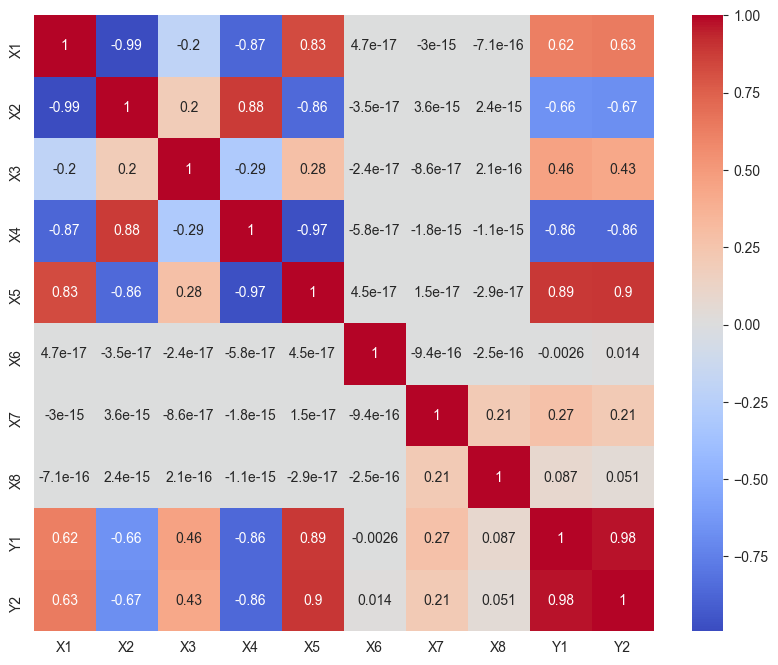

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

In [4]:
dataset.drop(['X1', 'X4'], axis=1)

,X2,X3,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,7.0,2,0.0,0,15.55,21.33
1,514.5,294.0,7.0,3,0.0,0,15.55,21.33
2,514.5,294.0,7.0,4,0.0,0,15.55,21.33
3,514.5,294.0,7.0,5,0.0,0,15.55,21.33
4,563.5,318.5,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...
763,784.0,343.0,3.5,5,0.4,5,17.88,21.40
764,808.5,367.5,3.5,2,0.4,5,16.54,16.88
765,808.5,367.5,3.5,3,0.4,5,16.44,17.11
766,808.5,367.5,3.5,4,0.4,5,16.48,16.61


In [5]:
trg = dataset[['Y1','Y2']]
trn = dataset.drop(['Y1','Y2'], axis=1)

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# Загрузка данных из текстового файла
data = pd.read_csv('ENB2012_data.csv')

# Разделение данных на признаки (X) и целевые переменные (Y)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = data[['Y1', 'Y2']]

# Разделение данных на обучающий и тестовый наборы
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.2)

models = [
    LinearRegression(), # Линейная регрессия
    RandomForestRegressor(n_estimators=100, max_features='sqrt'), # Случайный лес для регрессии
    KNeighborsRegressor(n_neighbors=6), # Метод ближайших соседей для регрессии
    SVR(kernel='linear'), # Метод опорных векторов для регрессии с линейным ядром
]


TestModels = pd.DataFrame()

# Для каждой модели из списка
for model in models:
    model_name = str(model).split('(')[0]  # Получаем имя модели
    
    # Создаем временный словарь для результатов текущей модели
    tmp = {'Model': model_name}
    
    # Для каждой целевой переменной
    for column in Y.columns:
        model.fit(Xtrn, Ytrn[column])
        y_pred = model.predict(Xtest)
        r2 = r2_score(Ytest[column], y_pred)
        tmp[f'R2_{column}'] = r2
    
    TestModels = TestModels.append(tmp, ignore_index=True)

# Устанавливаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_58700/773449493.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append(tmp, ignore_index=True)
/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_58700/773449493.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append(tmp, ignore_index=True)
/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_58700/773449493.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append(tmp, ignore_index=True)
/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_58700/773449493.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

<AxesSubplot: title={'center': 'R2_Y2'}, xlabel='Model'>

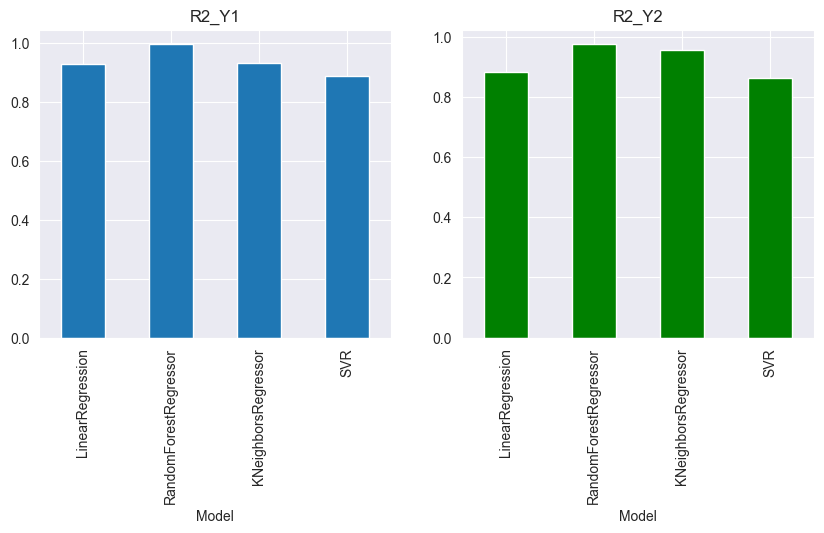

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')


In [8]:
model = models[1]
model.fit(Xtrn, Ytrn)

RandomForestRegressor(max_features='sqrt')

In [9]:
model.feature_importances_

array([0.18236311, 0.19301059, 0.06838846, 0.22209063, 0.24961825,
       0.00740509, 0.04990661, 0.02721727])

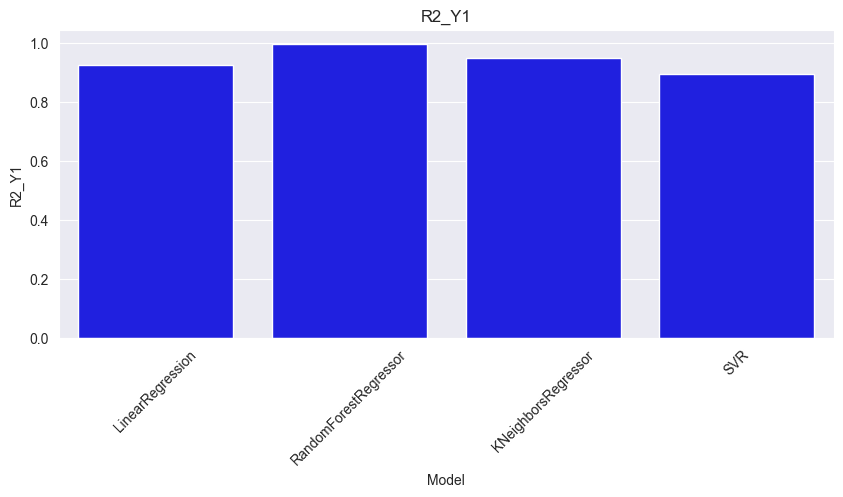

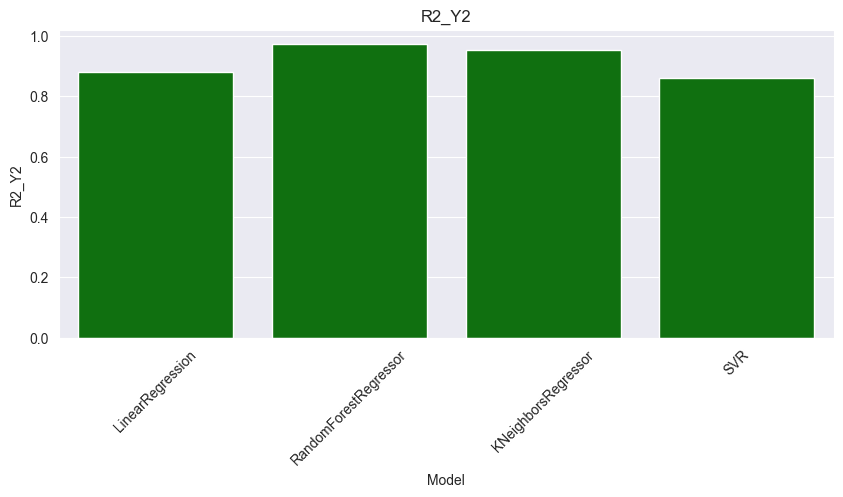

In [18]:
plt.figure(figsize=(10, 4))
sns.barplot(x=TestModels.index, y='R2_Y1', data=TestModels, color='blue', ax=plt.gca())
plt.title('R2_Y1')
plt.xticks(rotation=45)

# Добавляем второй сабплот для R2_Y2
plt.figure(figsize=(10, 4))
sns.barplot(x=TestModels.index, y='R2_Y2', data=TestModels, color='green', ax=plt.gca())
plt.title('R2_Y2')
plt.xticks(rotation=45)

plt.show()